In [12]:
import pandas as pd

data = pd.read_csv('creditcard.csv')


#Lấy header và số lượng mẫu
print(data.head())
print(data.info())

#284807 mẫu và 31 cột

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [13]:
print(data['Class'].value_counts())
print(data.isnull().sum())

# 284315 legal v.s 492 fraud
# missing values: 0


Class
0    284315
1       492
Name: count, dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [14]:
#percentage of fraud transactions
print(data['Class'].value_counts()/len(data))

#số lượng mẫu của 2 loại
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

print(len(legit))
print(len(fraud))

Class
0    0.998273
1    0.001727
Name: count, dtype: float64
284315
492


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Tách X, y
X = data.drop(columns=['Class']) 
y = data['Class']

# 2. Chuẩn hóa cột Time và Amount
print(data[['Time', 'Amount']].describe())

scaler = StandardScaler() # Phân phối chuẩn
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']]) # Chuẩn hóa

print("Sau khi chuẩn hóa")
print(X[['Time', 'Amount']].describe())

# 3. Chia train/test (giữ tỉ lệ nhãn với stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Fraud trong train:", y_train.mean())
print("Fraud trong test:", y_test.mean())


                Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000
Sau khi chuẩn hóa
               Time        Amount
count  2.848070e+05  2.848070e+05
mean  -5.109395e-17 -3.672378e-17
std    1.000002e+00  1.000002e+00
min   -1.996583e+00 -3.532294e-01
25%   -8.552120e-01 -3.308401e-01
50%   -2.131453e-01 -2.652715e-01
75%    9.372174e-01 -4.471707e-02
max    1.642058e+00  1.023622e+02
Train size: (227845, 30) Test size: (56962, 30)
Fraud trong train: 0.001729245759178389
Fraud trong test: 0.0017204452090867595


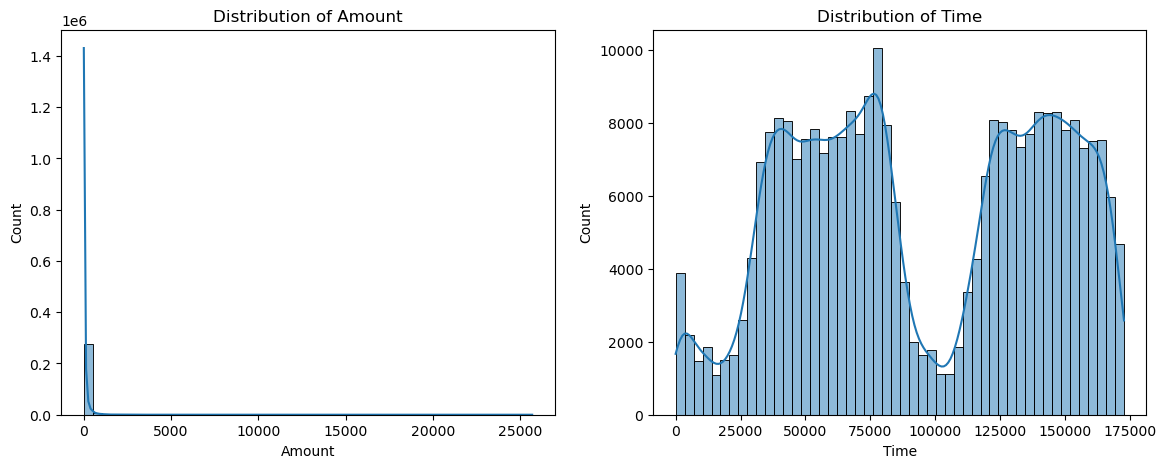

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount')

plt.subplot(1, 2, 2)
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Distribution of Time')

plt.show()

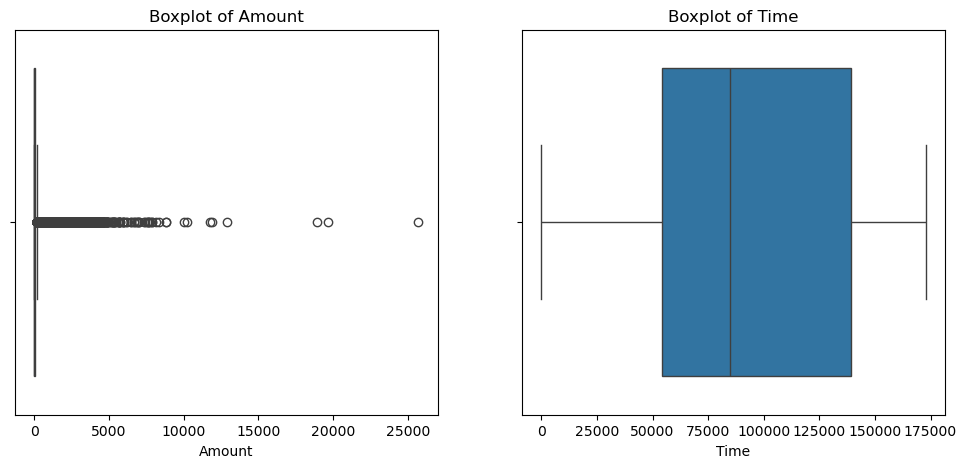

In [27]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['Amount'])
plt.title('Boxplot of Amount')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Time'])
plt.title('Boxplot of Time')

plt.show()

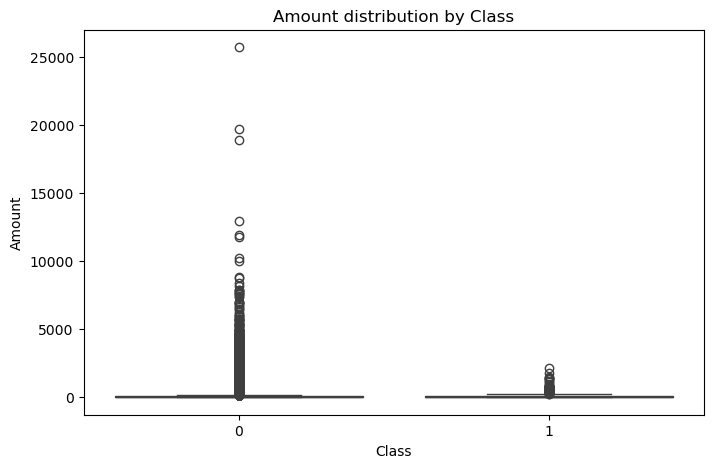

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Amount distribution by Class')
plt.show()

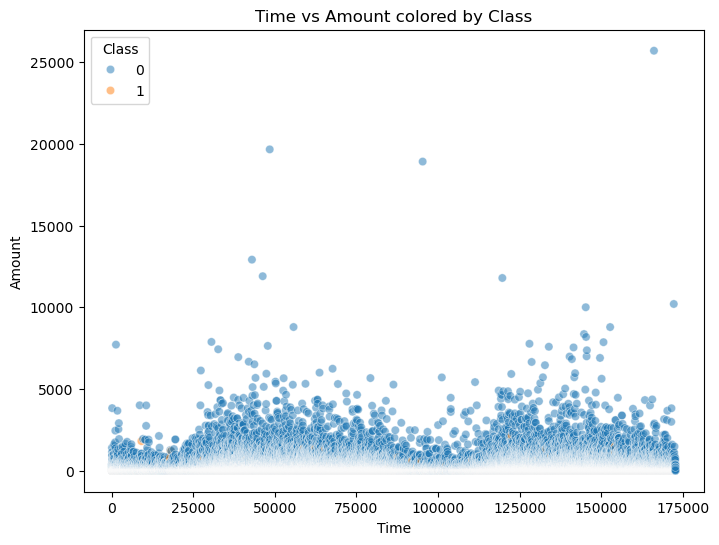

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data, alpha=0.5)
plt.title('Time vs Amount colored by Class')
plt.show()

In [ ]:
### TRAINING MODEL

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Khởi tạo Decision Tree với class_weight='balanced'
dt_model = DecisionTreeClassifier(
    criterion="gini",      # hoặc "entropy"
    max_depth=None,        # baseline chưa giới hạn độ sâu
    class_weight="balanced",
    random_state=42
)

# Huấn luyện
dt_model.fit(X_train, y_train)

# Dự đoán
y_pred = dt_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("Checkpoint1: Recall=" )


Confusion Matrix:
[[56830    34]
 [   27    71]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9994    0.9995     56864
           1     0.6762    0.7245    0.6995        98

    accuracy                         0.9989     56962
   macro avg     0.8379    0.8619    0.8495     56962
weighted avg     0.9990    0.9989    0.9989     56962



In [ ]:
from sklearn.model_selection import GridSearchCV 
#TUNING MODEL

# Khởi tạo model
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Bộ tham số cần tìm
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# GridSearch với 5-fold cross-validation
grid_search = GridSearchCV(
    dt,
    param_grid,
    scoring='recall',   # Tối ưu recall cho fraud
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Train
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)


print("=======================================================================================")

best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, digits=4))


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 0.8984096072703668
[[54350  2514]
 [   11    87]]
              precision    recall  f1-score   support

           0     0.9998    0.9558    0.9773     56864
           1     0.0334    0.8878    0.0645        98

    accuracy                         0.9557     56962
   macro avg     0.5166    0.9218    0.5209     56962
weighted avg     0.9981    0.9557    0.9757     56962



In [ ]:
########## Tuning Model ###############
#TEST NGƯỠNG HỢP LÝ

import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

# Lấy xác suất dự đoán cho lớp 1 (fraud)
y_proba = best_dt.predict_proba(X_test)[:, 1]

def evaluate_threshold(threshold):
    y_pred = (y_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.4f} | Recall: {recall:.4f}")
    return precision, recall

for t in np.arange(0.1, 0.91, 0.1):
    evaluate_threshold(t)


best_threshold = 0.7
y_pred_opt = (y_proba >= best_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt, digits=4))


Threshold: 0.10 | Precision: 0.0148 | Recall: 0.9286
Threshold: 0.20 | Precision: 0.0148 | Recall: 0.9286
Threshold: 0.30 | Precision: 0.0334 | Recall: 0.8878
Threshold: 0.40 | Precision: 0.0334 | Recall: 0.8878
Threshold: 0.50 | Precision: 0.0334 | Recall: 0.8878
Threshold: 0.60 | Precision: 0.0470 | Recall: 0.8878
Threshold: 0.70 | Precision: 0.0470 | Recall: 0.8878
Threshold: 0.80 | Precision: 0.0817 | Recall: 0.8673
Threshold: 0.90 | Precision: 0.0817 | Recall: 0.8673
[[55099  1765]
 [   11    87]]
              precision    recall  f1-score   support

           0     0.9998    0.9690    0.9841     56864
           1     0.0470    0.8878    0.0892        98

    accuracy                         0.9688     56962
   macro avg     0.5234    0.9284    0.5367     56962
weighted avg     0.9982    0.9688    0.9826     56962



In [ ]:
######## SMOTE LẦN 1 #############

from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


smote = SMOTE(sampling_strategy=1.0, random_state=42)  # 1.0 = cân bằng hoàn toàn
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Trước SMOTE:", y_train.value_counts())
print("Sau SMOTE:", y_train_res.value_counts())


dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_res, y_train_res)


y_pred = dt_smote.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


Trước SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
Sau SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64
[[56717   147]
 [   22    76]]
              precision    recall  f1-score   support

           0     0.9996    0.9974    0.9985     56864
           1     0.3408    0.7755    0.4735        98

    accuracy                         0.9970     56962
   macro avg     0.6702    0.8865    0.7360     56962
weighted avg     0.9985    0.9970    0.9976     56962



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Train RandomForest trên data sau SMOTE
rf_smote = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_smote.fit(X_train_res, y_train_res)

# Xác suất dự đoán cho class 1
y_proba = rf_smote.predict_proba(X_test)[:, 1]

# ===== Tìm threshold tối ưu theo F1 =====
best_threshold = 0.5
best_f1 = 0

thresholds = np.arange(0.1, 0.91, 0.01)
for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh, pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best threshold: {best_threshold:.2f}, Best F1: {best_f1:.4f}")

# Đánh giá lại với threshold tối ưu
y_pred_best = (y_proba >= best_threshold).astype(int)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1:", f1_score(y_test, y_pred_best))

print(classification_report(y_test, y_pred_best, digits=4))


Best threshold: 0.77, Best F1: 0.8588
Confusion Matrix:
[[56861     3]
 [   22    76]]
Precision: 0.9620253164556962
Recall: 0.7755102040816326
F1: 0.8587570621468926
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9620    0.7755    0.8588        98

    accuracy                         0.9996     56962
   macro avg     0.9808    0.8877    0.9293     56962
weighted avg     0.9995    0.9996    0.9995     56962



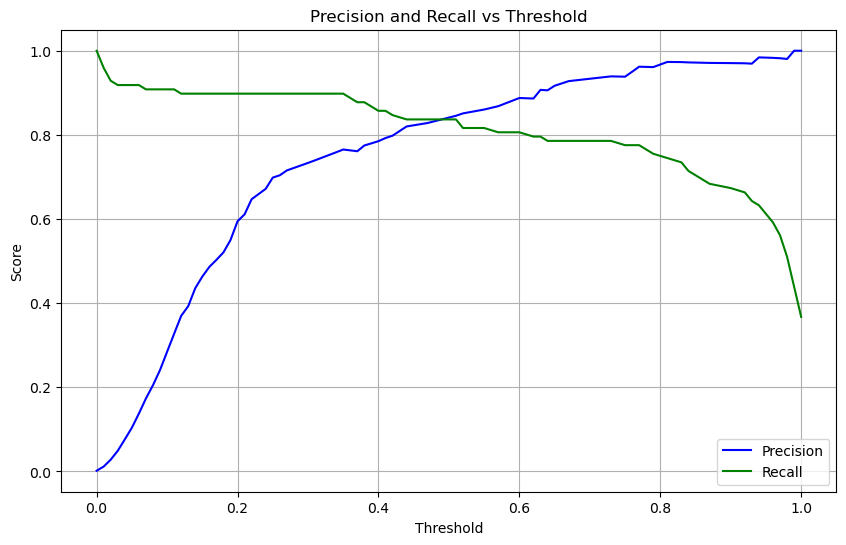

Average Precision: 0.8747


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Lấy xác suất dự đoán class 1 (fraud)
y_scores = rf_smote.predict_proba(X_test)[:, 1]

# Tính precision, recall và thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Vẽ đồ thị Precision-Recall vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color="b")
plt.plot(thresholds, recall[:-1], label="Recall", color="g")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

# In ra Average Precision để tham khảo
ap = average_precision_score(y_test, y_scores)
print(f"Average Precision: {ap:.4f}")
